In [57]:
import matplotlib.pyplot as plt
import time 
import numpy as np
from astropy.io import fits
import os

In [58]:
directorio='/Users/oscar/Documents/Documentos/Docs/LME/CCD/OscuraImagenes/'
contenido = os.listdir(directorio)

In [ ]:
##Prueba para verificar el algoritmo del demux
#No hace falta correr
for i in range(112):##se puede paralelizar este    
    for k in range (1200):
        img_total[:,k+nsamp*i]=scidata[:,(k*nsamp)+i]
        print("En img_total[",k +1200*i,"]"," cargo scidata[",(k*nsamp) + i,"]   k=",k,"    i=",i)

In [59]:
# Loop sobre todas las imagenes, se guarda en img_total cada ccd en fila demultiplexado
st = time.time()
for item in range(0,len(contenido)):
    hdulist = fits.open(directorio+contenido[item])
    tamx=int(hdulist[4].header['NAXIS1'])
    tamy=int(hdulist[4].header['NAXIS2'])
    nsamp=int(hdulist[4].header['NSAMP'])
    scidata = hdulist[4].data
    img_total= np.zeros((tamy, tamx))
    
    for i in range(0,nsamp):
        for k in range (0,int(tamx/nsamp)):
            img_total[:,k+i*int(tamx/nsamp)]=scidata[:,(k*nsamp)+i]
            
    print('Se termino la imagen ',item)   
    #plt.figure()
    #plt.imshow(img_total, cmap='gray')
    #plt.colorbar()

et = time.time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

Se termino la imagen  0
Se termino la imagen  1
Se termino la imagen  2
Se termino la imagen  3
Se termino la imagen  4
Execution time: 15.131470918655396 seconds


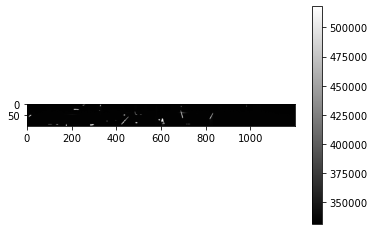

In [60]:
plt.figure()
plt.imshow(img_total[:,1200:2400], cmap='gray')
plt.colorbar()

In [47]:
import concurrent.futures

In [49]:
#Probar paralelizando
#Funcion a paralelizar demux
def demux(nombre):
    print("Comienza a demultiplexar \n")
    hdulist = fits.open(nombre)
    tamx=int(hdulist[4].header['NAXIS1'])
    tamy=int(hdulist[4].header['NAXIS2'])
    nsamp=int(hdulist[4].header['NSAMP'])
    scidata = hdulist[4].data
    img_total= np.zeros((tamy, tamx))
    tamxpimg=int(tamx/nsamp)
    
    for i in range(nsamp):
        for k in range (tamxpimg):
            img_total[:,k+tamxpimg*i]=scidata[:,(k*nsamp)+i]
    print('Se termino la imagen ') 
    

In [54]:
##Main
if __name__ == '__main__':    
    directorio='/Users/oscar/Documents/Documentos/Docs/LME/CCD/OscuraImagenes/'
    contenido = os.listdir(directorio)
    for j in range(0,len(contenido)):
        contenido[j]=directorio+contenido[j]
        
    t1 = time.perf_counter()
    #with concurrent.futures.ProcessPoolExecutor() as executor:
    with concurrent.futures.ThreadPoolExecutor() as executor:
        executor.map(demux, contenido)
    t2 = time.perf_counter()
    print(f'Finished in {t2-t1} seconds')


Comienza a demultiplexar 
Comienza a demultiplexar 


Comienza a demultiplexar 

Comienza a demultiplexar 

Comienza a demultiplexar 

Se termino la imagen 
Se termino la imagen 
Se termino la imagen 
Se termino la imagen 
Se termino la imagen 
Finished in 12.781269699999939 seconds


In [61]:
from numba import jit,prange

In [62]:
#Funcion a optimizar
#Necesita trabajar solo con arrays
@jit(parallel=True)
def demux2(tamx,tamy,nsamp,scidata):
    img_total= np.zeros((tamy, tamx))
    tamxpimg=int(tamx/nsamp)
    for i in prange(nsamp):##se puede paralelizar este
        
        for k in range (tamxpimg):
            img_total[:,k+tamxpimg*i]=scidata[:,(k*nsamp)+i]
            
    print('Se termino la imagen ')   


In [63]:
directorio='/Users/oscar/Documents/Documentos/Docs/LME/CCD/OscuraImagenes/'
contenido = os.listdir(directorio) 
for j in range(0,len(contenido)):
    contenido[j]=directorio+contenido[j]
    
st = time.time()
for iterador in range(0,len(contenido)): #For para cada item del directorio
    hdulist = fits.open(contenido[iterador])
    tamx=int(hdulist[4].header['NAXIS1'])
    tamy=int(hdulist[4].header['NAXIS2'])
    nsamp=int(hdulist[4].header['NSAMP'])
    scidata = hdulist[4].data
    demux2(tamx,tamy,nsamp,scidata)
et = time.time()
elapsed_time = et - st
print('First Execution time :', elapsed_time, 'seconds')


st = time.time()
for iterador in range(0,len(contenido)): #For para cada item del directorio
    hdulist = fits.open(contenido[iterador])
    tamx=int(hdulist[4].header['NAXIS1'])
    tamy=int(hdulist[4].header['NAXIS2'])
    nsamp=int(hdulist[4].header['NSAMP'])
    scidata = hdulist[4].data
    demux2(tamx,tamy,nsamp,scidata)

et = time.time()
elapsed_time = et - st
print('Second Execution time :', elapsed_time, 'seconds')

Se termino la imagen 
Se termino la imagen 
Se termino la imagen 
Se termino la imagen 
Se termino la imagen 
First Execution time : 11.310257911682129 seconds
Se termino la imagen 
Se termino la imagen 
Se termino la imagen 
Se termino la imagen 
Se termino la imagen 
Second Execution time : 9.853232860565186 seconds
